In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16 

In [27]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [28]:
df = pd.read_csv("db-tele.csv")
df.head()

YYYYMM Customer_ID     Cities  Column_Order    Value Added Services  \
0  197301    CG-12520     Mumbai             1  Devotional Application   
1  197302    EB-13840    Kolkata             1  Devotional Application   
2  197303    CV-12805  Bengaluru             1  Devotional Application   
3  197304    CD-11980      Kochi             1  Devotional Application   
4  197305    JB-15925     Kanpur             1  Devotional Application   

  Device Name Device Category   Sales Queries Solved  
0       Xiomi              4G  72.076            Yes  
1     Samsung              4G  64.442            Yes  
2     Oneplus              4G  64.084            Yes  
3       Nexus              3G  60.842            Yes  
4        Asus              4G  61.798            Yes

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 9 columns):
YYYYMM                  5094 non-null int64
Customer_ID             5094 non-null object
Cities                  5094 non-null object
Column_Order            5094 non-null int64
Value Added Services    5094 non-null object
Device Name             5094 non-null object
Device Category         5094 non-null object
Sales                   5094 non-null object
Queries Solved          5094 non-null object
dtypes: int64(2), object(7)
memory usage: 358.2+ KB


In [30]:
dateparse = lambda x: pd.to_datetime(x, format='%Y%m', errors = 'coerce')
df = pd.read_csv("db-tele.csv", parse_dates=['YYYYMM'], index_col='YYYYMM', date_parser=dateparse) 
df.head()

Customer_ID     Cities  Column_Order    Value Added Services  \
YYYYMM                                                                    
1973-01-01    CG-12520     Mumbai             1  Devotional Application   
1973-02-01    EB-13840    Kolkata             1  Devotional Application   
1973-03-01    CV-12805  Bengaluru             1  Devotional Application   
1973-04-01    CD-11980      Kochi             1  Devotional Application   
1973-05-01    JB-15925     Kanpur             1  Devotional Application   

           Device Name Device Category   Sales Queries Solved  
YYYYMM                                                         
1973-01-01       Xiomi              4G  72.076            Yes  
1973-02-01     Samsung              4G  64.442            Yes  
1973-03-01     Oneplus              4G  64.084            Yes  
1973-04-01       Nexus              3G  60.842            Yes  
1973-05-01        Asus              4G  61.798            Yes

In [31]:
df.head(15)

Customer_ID      Cities  Column_Order    Value Added Services  \
YYYYMM                                                                     
1973-01-01    CG-12520      Mumbai             1  Devotional Application   
1973-02-01    EB-13840     Kolkata             1  Devotional Application   
1973-03-01    CV-12805   Bengaluru             1  Devotional Application   
1973-04-01    CD-11980       Kochi             1  Devotional Application   
1973-05-01    JB-15925      Kanpur             1  Devotional Application   
1973-06-01    LT-17110  Coimbatore             1  Devotional Application   
1973-07-01    JL-15850  Coimbatore             1  Devotional Application   
1973-08-01    MS-17365  Coimbatore             1  Devotional Application   
1973-09-01    PK-19075   Jaisalmer             1  Devotional Application   
1973-10-01    CG-12520    Bhatpara             1  Devotional Application   
1973-11-01    EB-13840   Bengaluru             1  Devotional Application   
1973-12-01    CL-12565    Bhatpara             1  Devotional Application   
NaT           CD-11980    Guwahati             1  Devotional Application   
1974-01-01    JB-15925   Bhagalpur             1  Devotional Application   
1974-02-01    SA-20830      Raipur             1  Devotional Application   

           Device Name Device Category    Sales Queries Solved  
YYYYMM                                                          
1973-01-01       Xiomi              4G   72.076            Yes  
1973-02-01     Samsung              4G   64.442            Yes  
1973-03-01     Oneplus              4G   64.084            Yes  
1973-04-01       Nexus              3G   60.842            Yes  
1973-05-01        Asus              4G   61.798            Yes  
1973-06-01     Samsung              4G   66.538            Yes  
1973-07-01        Asus              4G   72.626            Yes  
1973-08-01        Oppo              4G   75.181             No  
1973-09-01      iPhone              3G   68.397            Yes  
1973-10-01     Oneplus              4G   67.668            Yes  
1973-11-01      iPhone              3G   67.021            Yes  
1973-12-01    Micromax              4G   71.118            Yes  
NaT            Oneplus              4G  811.791            Yes  
1974-01-01         HTC              4G    70.55            Yes  
1974-02-01        Oppo              4G   62.929            Yes

In [32]:
ts = df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]
ts.head(15)

Customer_ID      Cities  Column_Order    Value Added Services  \
YYYYMM                                                                     
1973-01-01    CG-12520      Mumbai             1  Devotional Application   
1973-02-01    EB-13840     Kolkata             1  Devotional Application   
1973-03-01    CV-12805   Bengaluru             1  Devotional Application   
1973-04-01    CD-11980       Kochi             1  Devotional Application   
1973-05-01    JB-15925      Kanpur             1  Devotional Application   
1973-06-01    LT-17110  Coimbatore             1  Devotional Application   
1973-07-01    JL-15850  Coimbatore             1  Devotional Application   
1973-08-01    MS-17365  Coimbatore             1  Devotional Application   
1973-09-01    PK-19075   Jaisalmer             1  Devotional Application   
1973-10-01    CG-12520    Bhatpara             1  Devotional Application   
1973-11-01    EB-13840   Bengaluru             1  Devotional Application   
1973-12-01    CL-12565    Bhatpara             1  Devotional Application   
1974-01-01    JB-15925   Bhagalpur             1  Devotional Application   
1974-02-01    SA-20830      Raipur             1  Devotional Application   
1974-03-01    JL-15850     Patiala             1  Devotional Application   

           Device Name Device Category   Sales Queries Solved  
YYYYMM                                                         
1973-01-01       Xiomi              4G  72.076            Yes  
1973-02-01     Samsung              4G  64.442            Yes  
1973-03-01     Oneplus              4G  64.084            Yes  
1973-04-01       Nexus              3G  60.842            Yes  
1973-05-01        Asus              4G  61.798            Yes  
1973-06-01     Samsung              4G  66.538            Yes  
1973-07-01        Asus              4G  72.626            Yes  
1973-08-01        Oppo              4G  75.181             No  
1973-09-01      iPhone              3G  68.397            Yes  
1973-10-01     Oneplus              4G  67.668            Yes  
1973-11-01      iPhone              3G  67.021            Yes  
1973-12-01    Micromax              4G  71.118            Yes  
1974-01-01         HTC              4G   70.55            Yes  
1974-02-01        Oppo              4G  62.929            Yes  
1974-03-01         HTC              4G  64.519            Yes

In [33]:
ts.dtypes

Customer_ID             object
Cities                  object
Column_Order             int64
Value Added Services    object
Device Name             object
Device Category         object
Sales                   object
Queries Solved          object
dtype: object

In [34]:
#ss = ts.copy(deep=True)
ts['Sales'] = pd.to_numeric(ts['Sales'] , errors='coerce')
ts.head()

Customer_ID     Cities  Column_Order    Value Added Services  \
YYYYMM                                                                    
1973-01-01    CG-12520     Mumbai             1  Devotional Application   
1973-02-01    EB-13840    Kolkata             1  Devotional Application   
1973-03-01    CV-12805  Bengaluru             1  Devotional Application   
1973-04-01    CD-11980      Kochi             1  Devotional Application   
1973-05-01    JB-15925     Kanpur             1  Devotional Application   

           Device Name Device Category   Sales Queries Solved  
YYYYMM                                                         
1973-01-01       Xiomi              4G  72.076            Yes  
1973-02-01     Samsung              4G  64.442            Yes  
1973-03-01     Oneplus              4G  64.084            Yes  
1973-04-01       Nexus              3G  60.842            Yes  
1973-05-01        Asus              4G  61.798            Yes

In [35]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4707 entries, 1973-01-01 to 2016-07-01
Data columns (total 8 columns):
Customer_ID             4707 non-null object
Cities                  4707 non-null object
Column_Order            4707 non-null int64
Value Added Services    4707 non-null object
Device Name             4707 non-null object
Device Category         4707 non-null object
Sales                   4323 non-null float64
Queries Solved          4707 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 331.0+ KB


In [36]:
ts.dropna(inplace = True)

In [38]:
Telecom_company = ts.groupby('Value Added Services')
Telecom_company.head()

Customer_ID         Cities  Column_Order  \
YYYYMM                                                
1973-01-01    CG-12520         Mumbai             1   
1973-02-01    EB-13840        Kolkata             1   
1973-03-01    CV-12805      Bengaluru             1   
1973-04-01    CD-11980          Kochi             1   
1973-05-01    JB-15925         Kanpur             1   
1973-01-01    MY-17380      Bengaluru             2   
1973-02-01    KM-16720      Bengaluru             2   
1973-03-01    FM-14380       Gopalpur             2   
1973-04-01    JB-15400         Rajkot             2   
1973-05-01    PO-19195        Kolkata             2   
1973-01-01    GT-14710      New Delhi             3   
1973-02-01    EB-13840  Muzaffarnagar             3   
1973-03-01    TS-21610           Pune             3   
1973-04-01    AB-10165       Tiruppur             3   
1973-05-01    KL-16645         Kalyan             3   
1973-01-01    DB-13210      Gorakhpur             4   
1973-02-01    KM-16720          Surat             4   
1973-03-01    LC-17140       Panihati             4   
1973-04-01    MP-17470      New Delhi             4   
1973-05-01    DC-13285       Panihati             4   
1973-01-01    HP-14815      Bengaluru             5   
1973-02-01    DV-13465       Amritsar             5   
1973-03-01    PF-19165        Udaipur             5   
1973-04-01    AB-10165      Gorakhpur             5   
1973-05-01    DL-13315          Surat             5   
1973-01-01    AA-10375      Bengaluru             6   
1973-02-01    JE-15745       Kolhapur             6   
1973-03-01    CC-12430          Kochi             6   
1973-04-01    MP-17470      Bengaluru             6   
1973-05-01    NB-18655       Amritsar             6   
1989-01-01    CA-12265       Durgapur             7   
1989-02-01    BM-11140  Muzaffarnagar             7   
1989-03-01    EG-13900          Surat             7   
1989-04-01    BB-10990      Gorakhpur             7   
1989-05-01    BM-11650     Coimbatore             7   
1989-01-01    DK-13090          Salem             8   
1989-02-01    GT-14635         Kanpur             8   
1989-03-01    VD-21670      Gorakhpur             8   
1989-04-01    ES-14020      kozhikode             8   
1989-05-01    AC-10420  Muzaffarnagar             8   
1973-01-01    LH-16900         Kanpur             9   
1973-02-01    CK-12595     Coimbatore             9   
1973-03-01    NP-18670     Coimbatore             9   
1973-04-01    SC-20695     Coimbatore             9   
1973-05-01    CA-12310      Jaisalmer             9   

                          Value Added Services Device Name Device Category  \
YYYYMM                                                                       
1973-01-01              Devotional Application       Xiomi              4G   
1973-02-01              Devotional Application     Samsung              4G   
1973-03-01              Devotional Application     Oneplus              4G   
1973-04-01              Devotional Application       Nexus              3G   
1973-05-01              Devotional Application        Asus              4G   
1973-01-01                   Social Networking   Panasonic              4G   
1973-02-01                   Social Networking        Oppo              4G   
1973-03-01                   Social Networking     Samsung              4G   
1973-04-01                   Social Networking     Samsung              4G   
1973-05-01                   Social Networking     Samsung              4G   
1973-01-01                         Live Sports    Motorola              2G   
1973-02-01                         Live Sports     Oneplus              4G   
1973-03-01                         Live Sports     Samsung              4G   
1973-04-01                         Live Sports    Motorola              2G   
1973-05-01                         Live Sports      iPhone              3G   
1973-01-01  Phone backup and security services    Micromax              4G   
1973-02-01  Phone bac

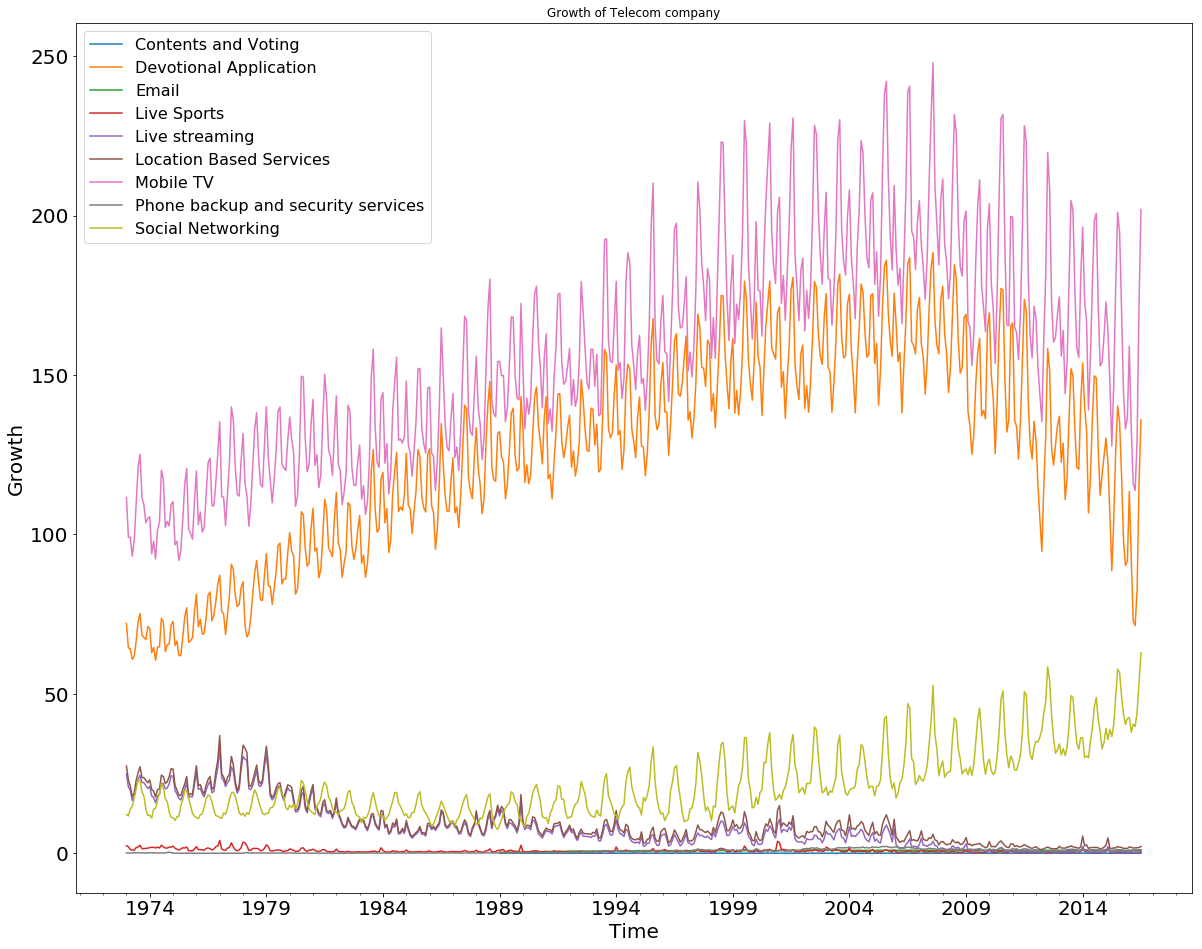

In [89]:
fig, ax = plt.subplots()
for desc, group in Telecom_company:
    group.plot(x = group.index, y='Sales', label=desc,ax = ax, title='Growth of Telecom company', fontsize = 20)
    ax.set_xlabel('Time')
    ax.set_ylabel('Growth')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

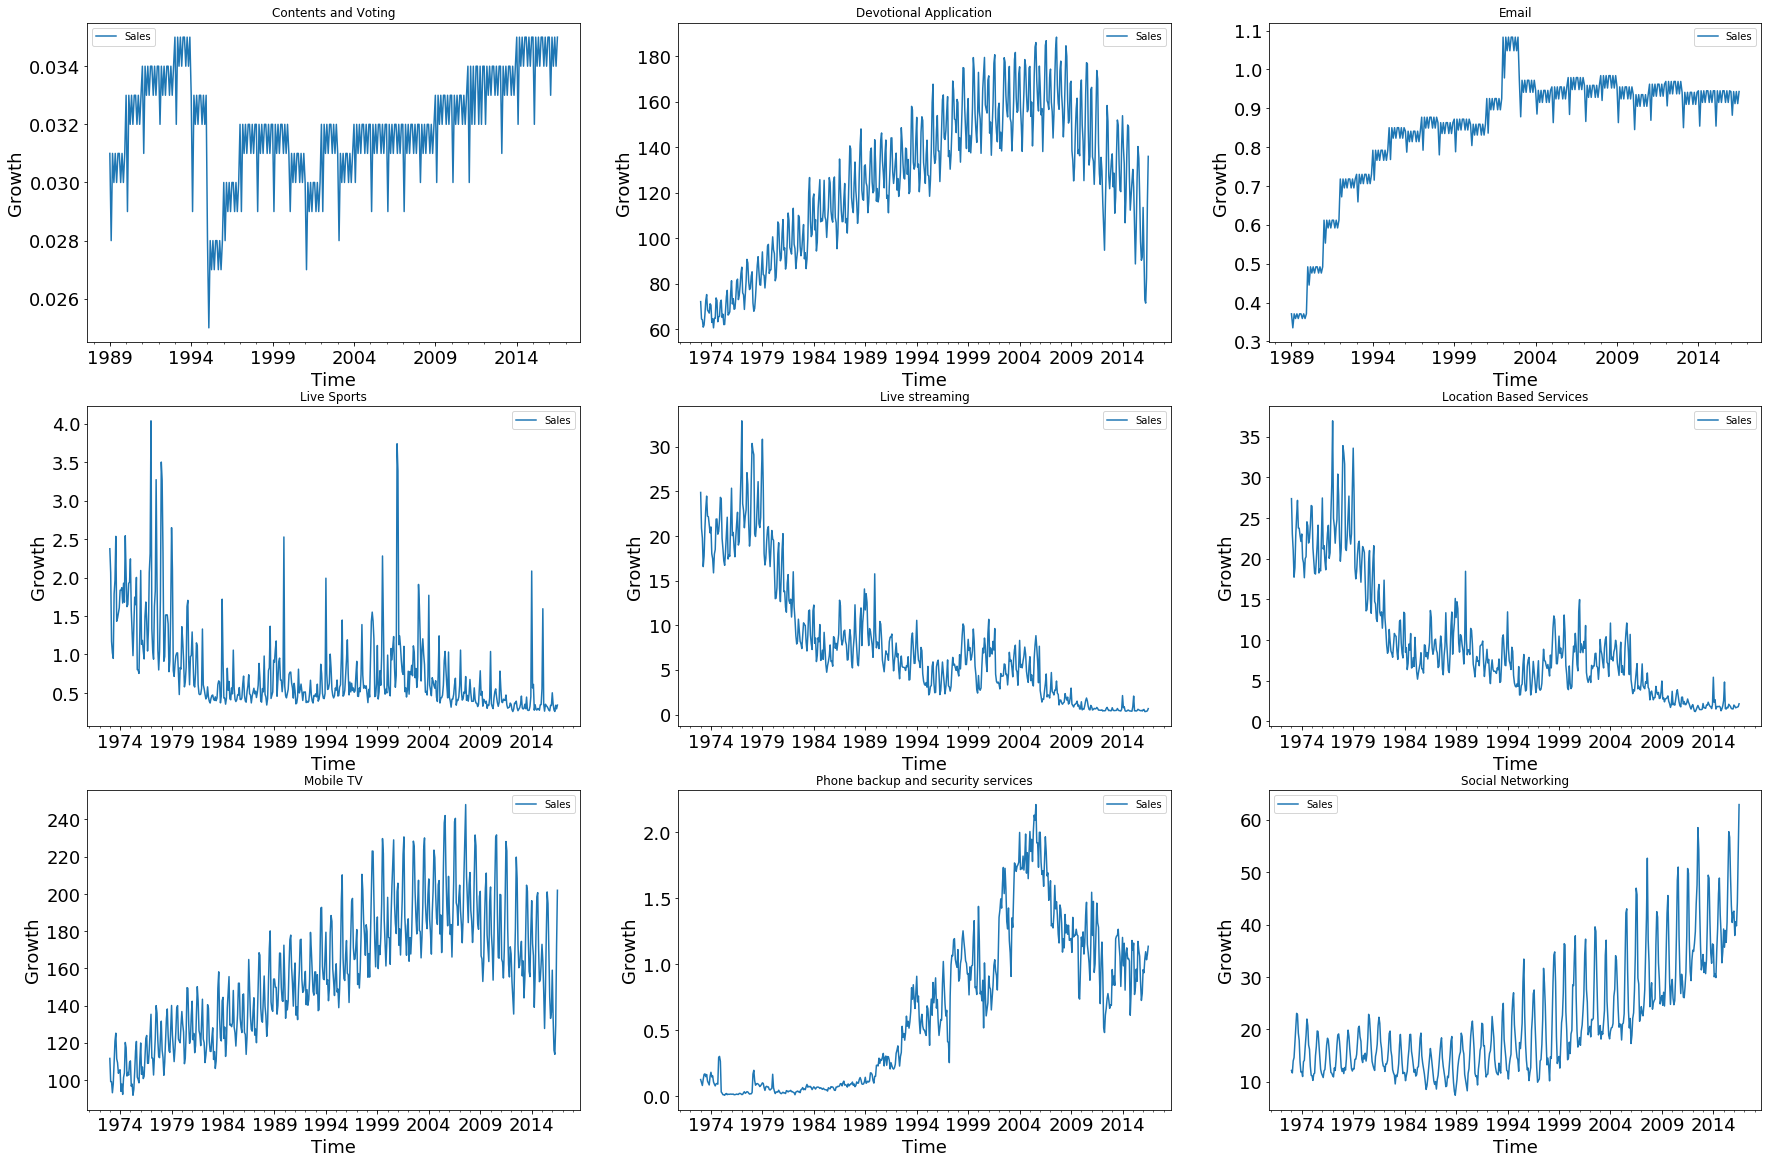

In [90]:
fig, axes = plt.subplots(3,3, figsize = (30, 20))
for (desc, group), ax in zip(Telecom_company, axes.flatten()):
    group.plot(x = group.index, y='Sales',ax = ax, title=desc, fontsize = 18)
    ax.set_xlabel('Time')
    ax.set_ylabel('Growth')
    ax.xaxis.label.set_size(18)
    ax.yaxis.label.set_size(18)

In [91]:
growth_of_company = ts.groupby('Value Added Services')['Sales'].sum().sort_values()

In [92]:
growth_of_company.index

Index(['Contents and Voting', 'Email', 'Phone backup and security services',
       'Live Sports', 'Live streaming', 'Location Based Services',
       'Social Networking', 'Devotional Application', 'Mobile TV'],
      dtype='object', name='Value Added Services')

In [93]:
cols = ['Email', 'Phone backup and security services', 'Social Networking',
       'Live Sports', 'Location Based Services', 'Contents and Voting',
       'Mobile TV', 'Live streaming', 'Devotional Application']

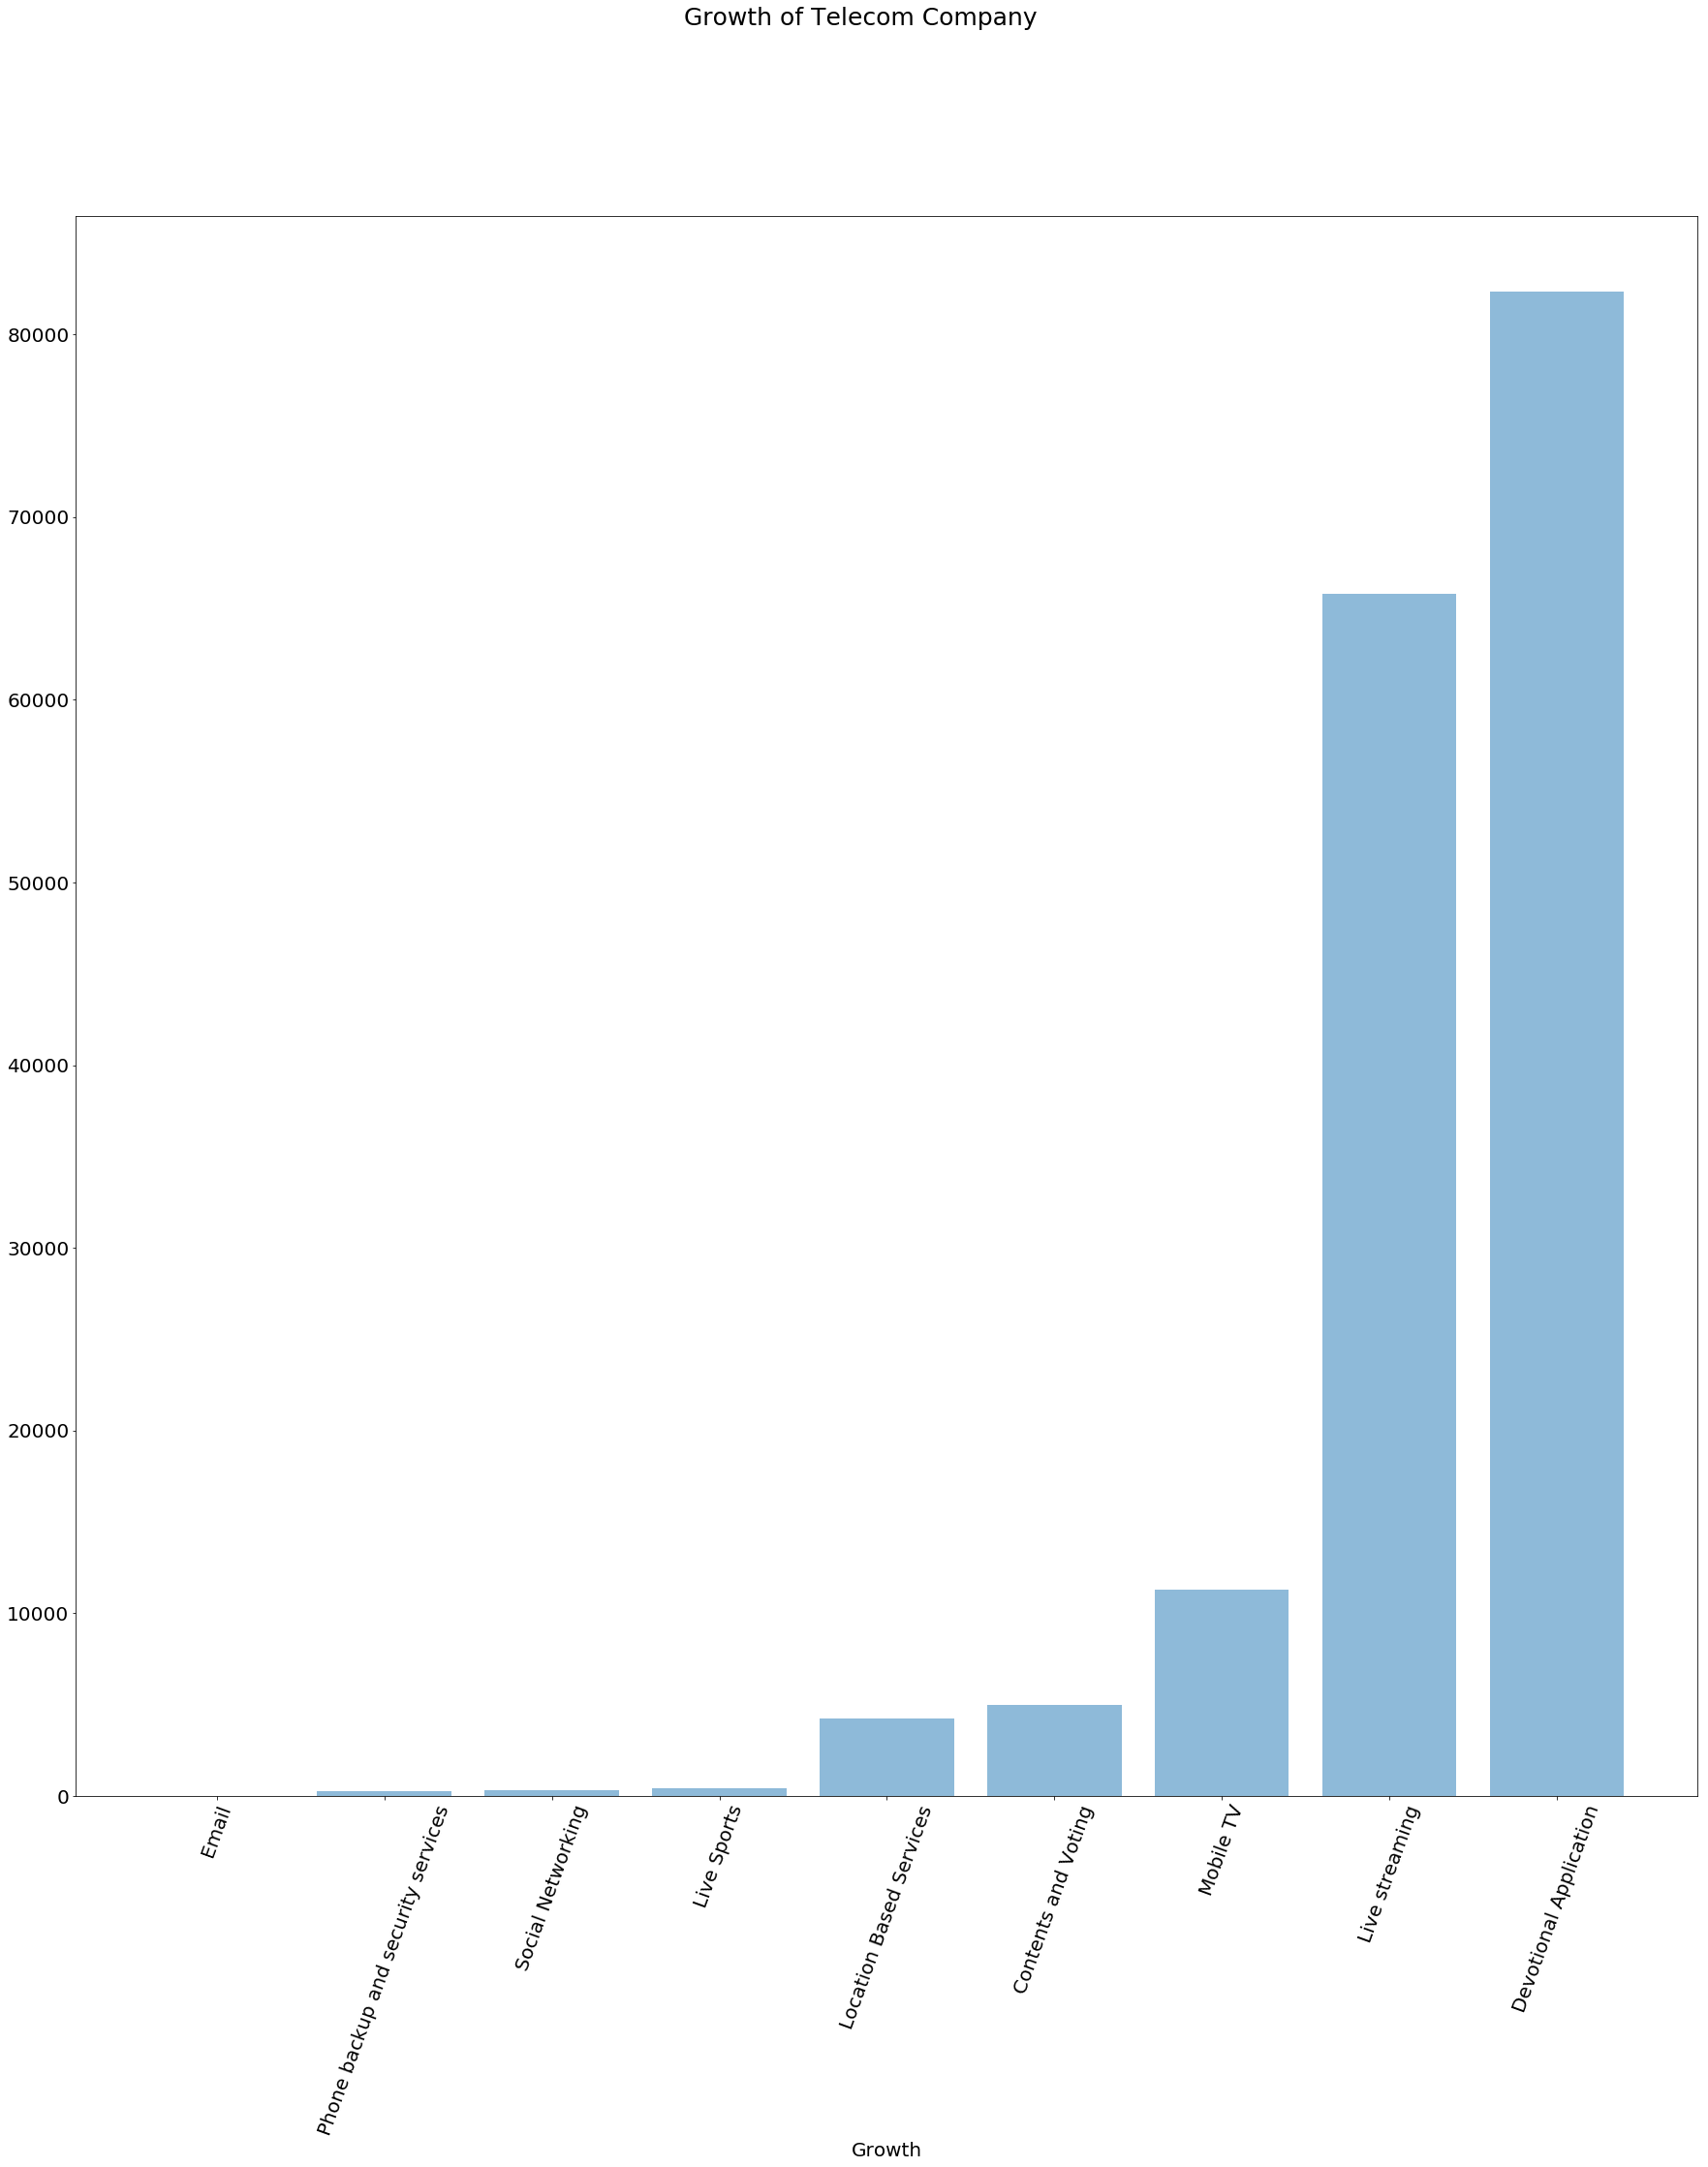

In [94]:
fig = plt.figure(figsize = (30,30))
x_label = cols
x_tick = np.arange(len(cols))
plt.bar(x_tick, growth_of_company, align = 'center', alpha = 0.5)
fig.suptitle("Growth of Telecom Company", fontsize= 25)
plt.xticks(x_tick, x_label, rotation = 70, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Growth', fontsize = 20)
plt.show()

In [95]:
Locations = ts.iloc[:,1:]   # Monthly total emissions (mte)
Locations= Locations.groupby(['Value Added Services', pd.TimeGrouper('M')])['Sales'].sum().unstack(level = 0)
lps = Locations['Social Networking'] 
lps.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Social Networking, dtype: float64

In [48]:
lps.tail()

YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Social Networking, dtype: float64

In [49]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

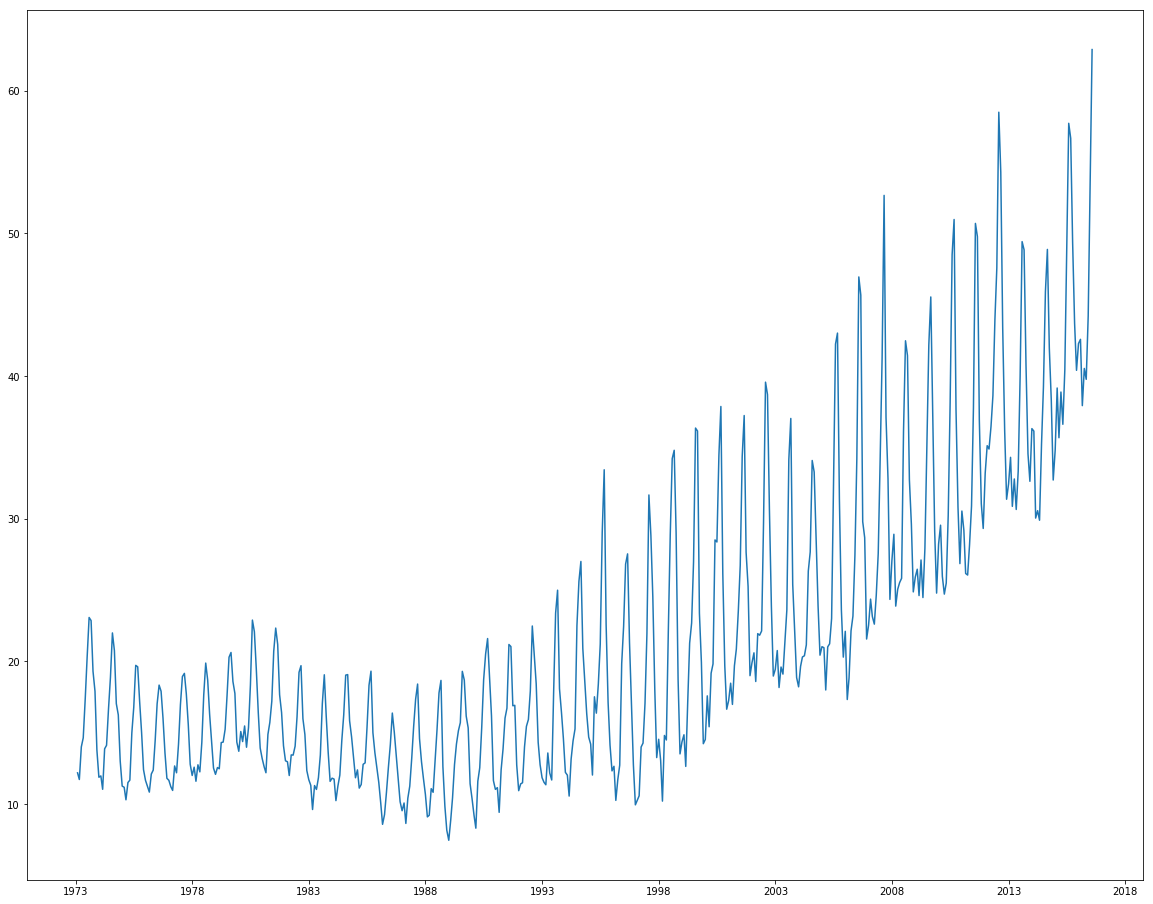

In [50]:
plt.plot(lps)

In [51]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Services', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [52]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

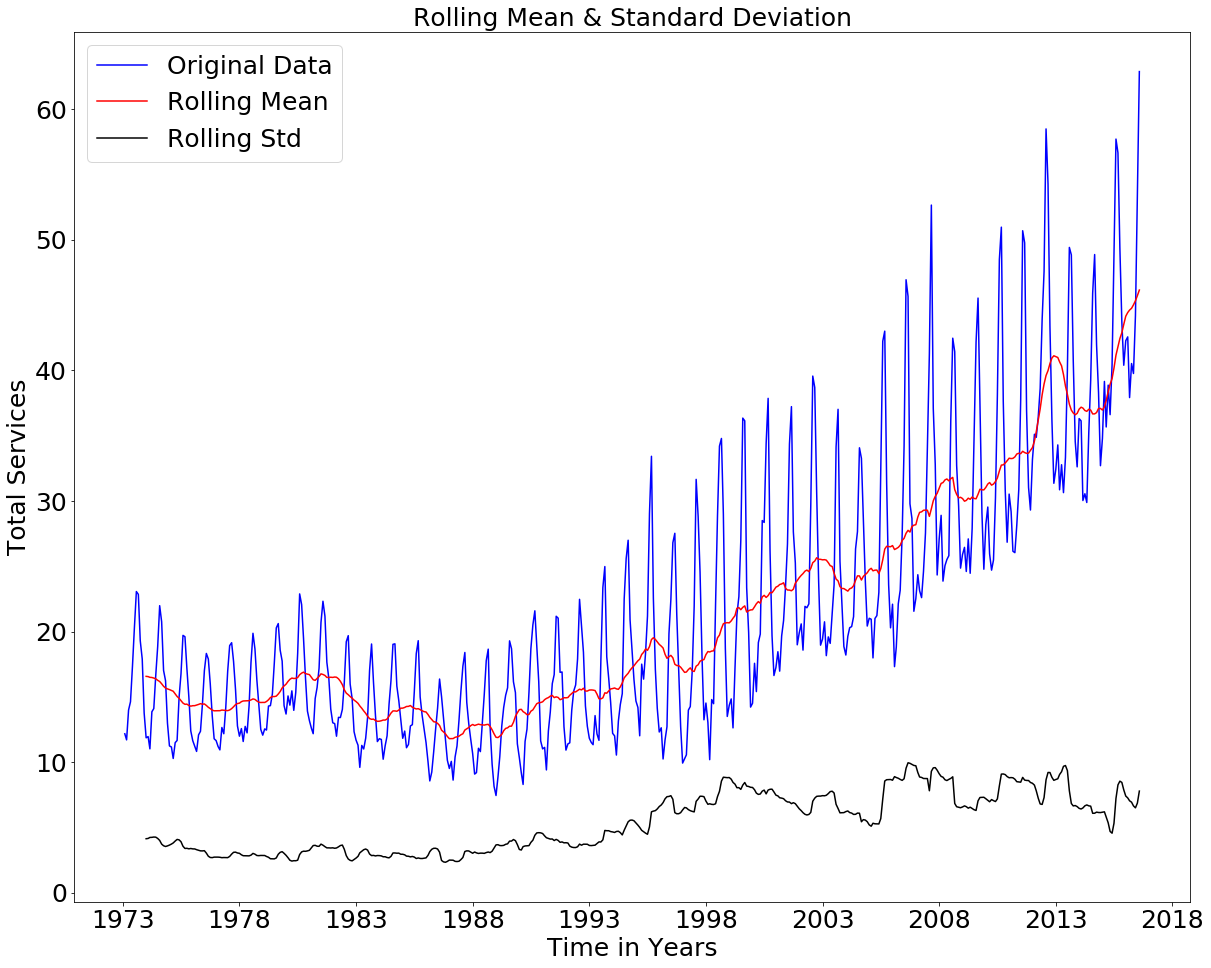

In [53]:
TestStationaryPlot(lps)

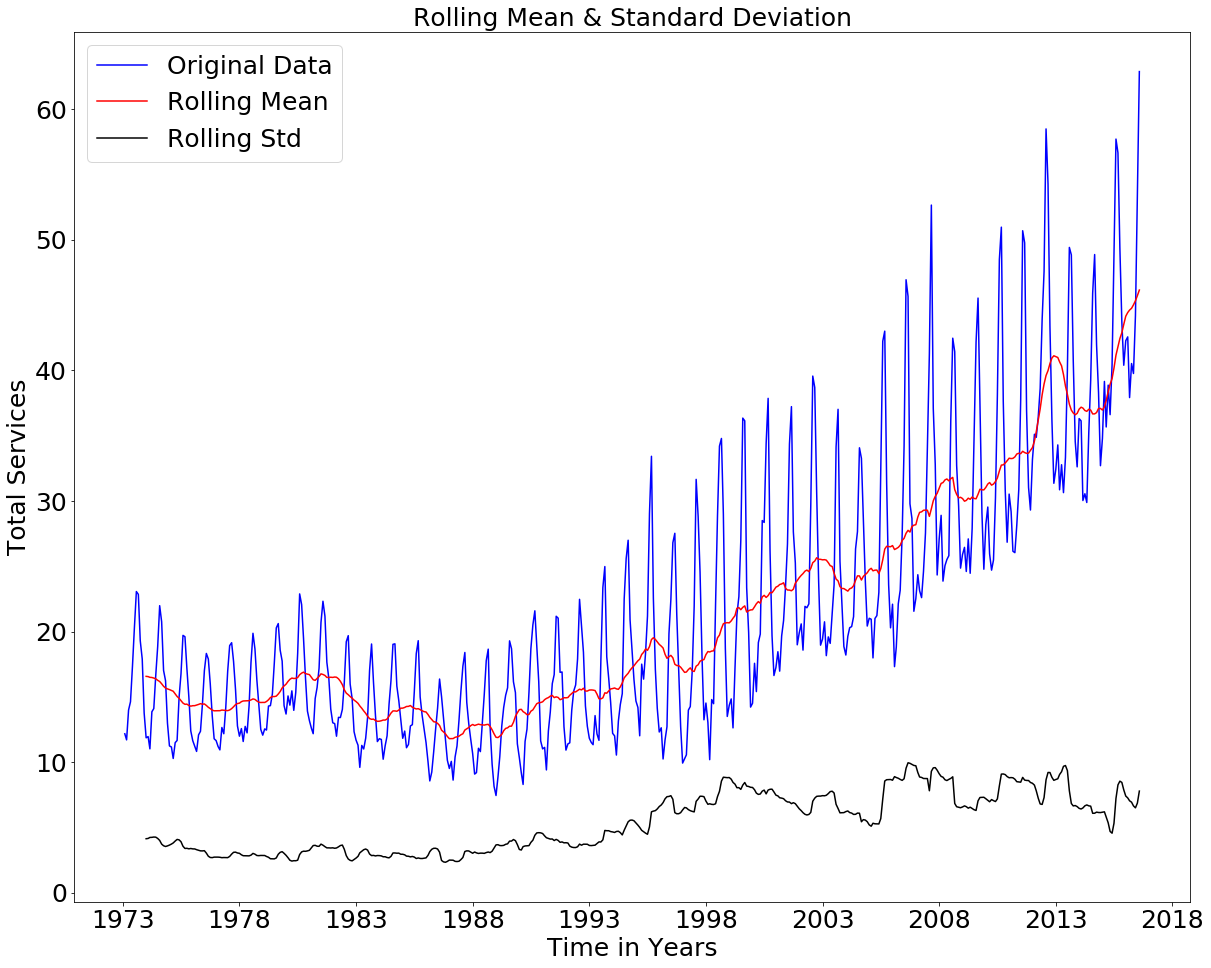

In [54]:
TestStationaryPlot(lps)

In [55]:
TestStationaryAdfuller(lps)

Test Statistic                   1.831215
p-value                          0.998409
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


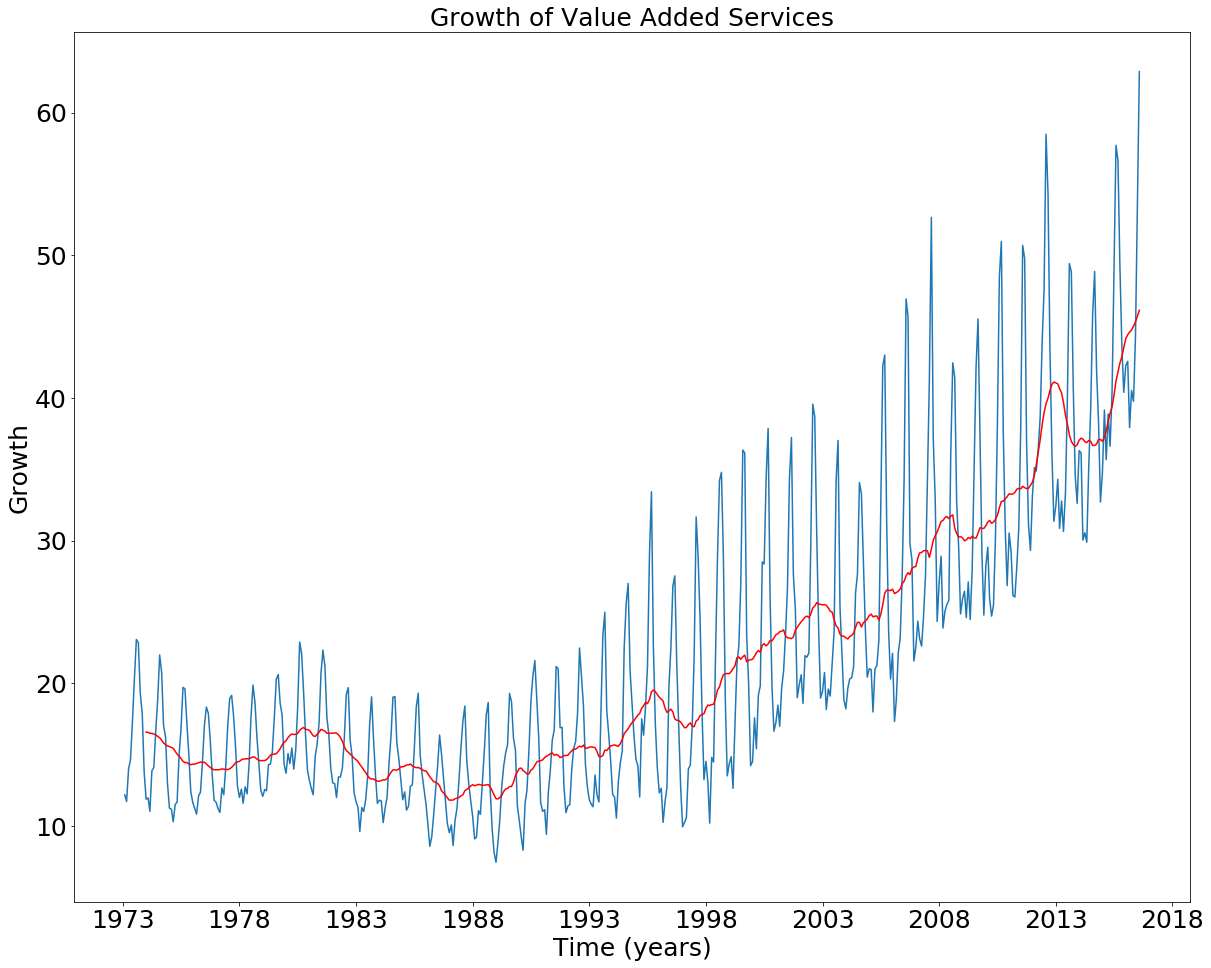

In [56]:
moving_avg = lps.rolling(12).mean()
plt.plot(lps)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('Growth', fontsize = 25)
plt.title('Growth of Value Added Services', fontsize = 25)
plt.show()

In [57]:
lps_moving_avg_diff = lps - moving_avg
lps_moving_avg_diff.head(13)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31   -4.705333
1974-01-31   -4.594333
Freq: M, Name: Social Networking, dtype: float64

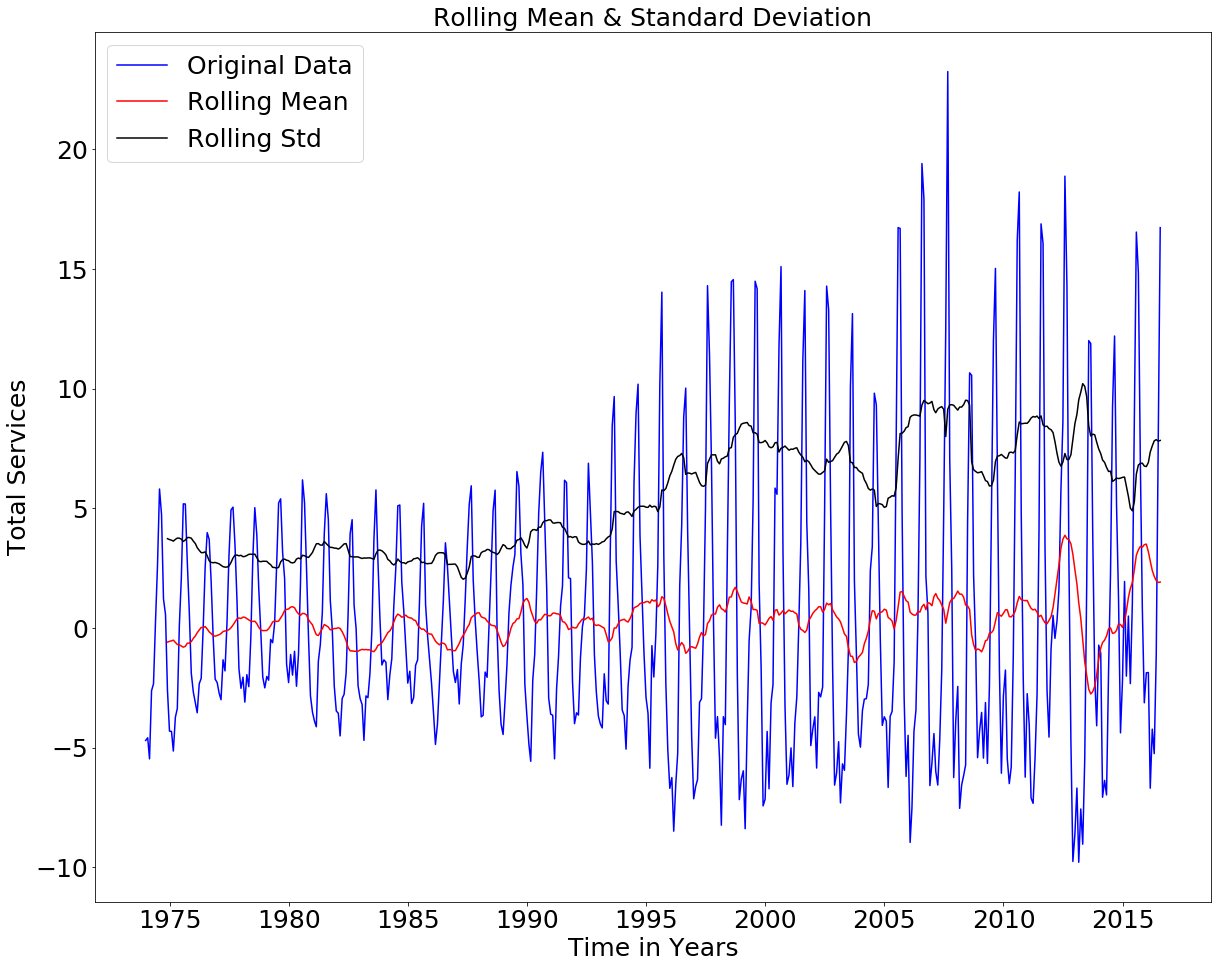

In [58]:
lps_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(lps_moving_avg_diff)

In [59]:
TestStationaryAdfuller(lps_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


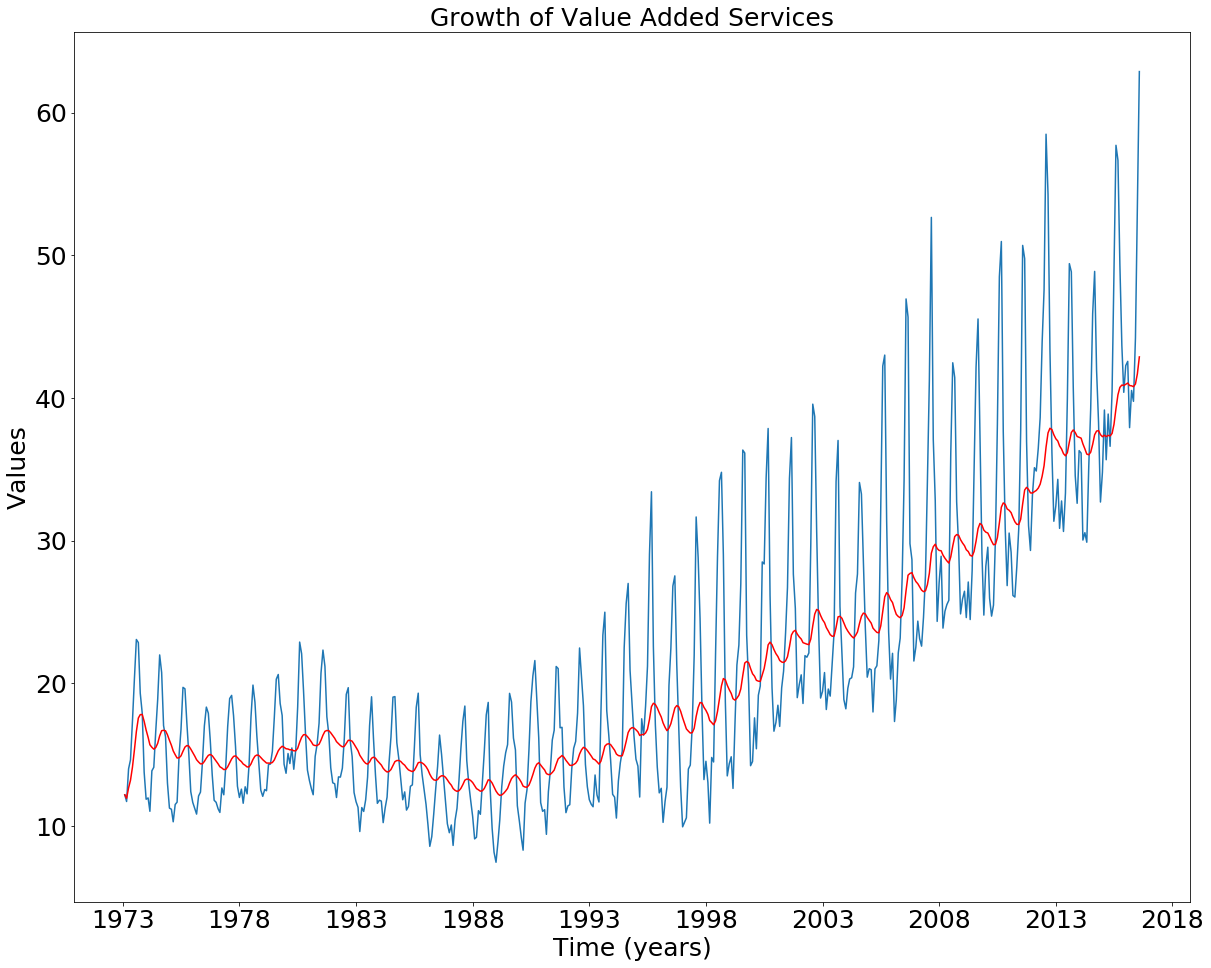

In [60]:
lps_exp_wighted_avg = pd.ewma(lps, halflife=12)
plt.plot(lps)
plt.plot(lps_exp_wighted_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('Values', fontsize = 25)
plt.title('Growth of Value Added Services', fontsize = 25)
plt.show()

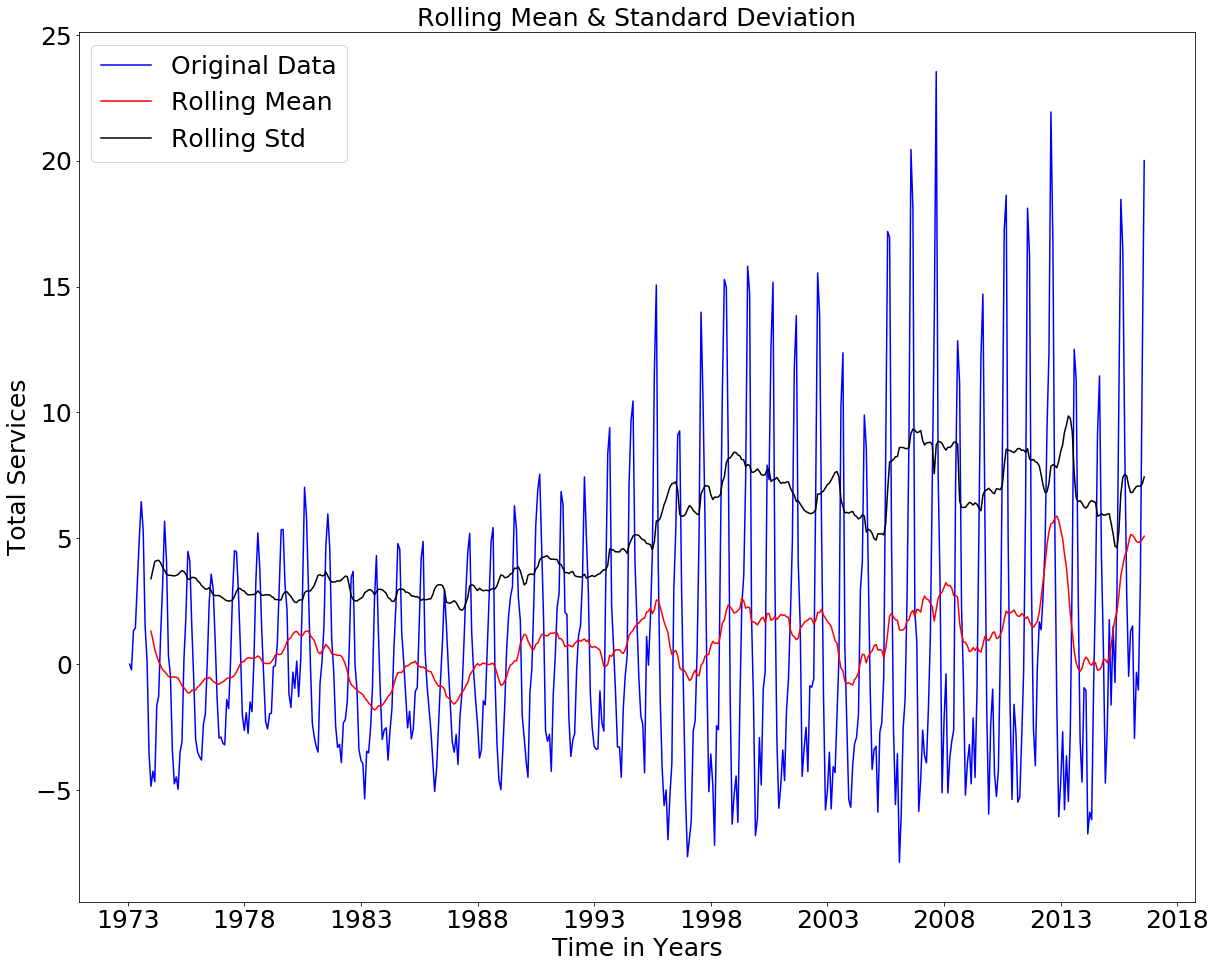

In [61]:
lps_ewma_diff = lps - lps_exp_wighted_avg
TestStationaryPlot(lps_ewma_diff)


In [62]:
TestStationaryAdfuller(lps_ewma_diff)


Test Statistic                  -3.423915
p-value                          0.010170
#Lags Used                      19.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


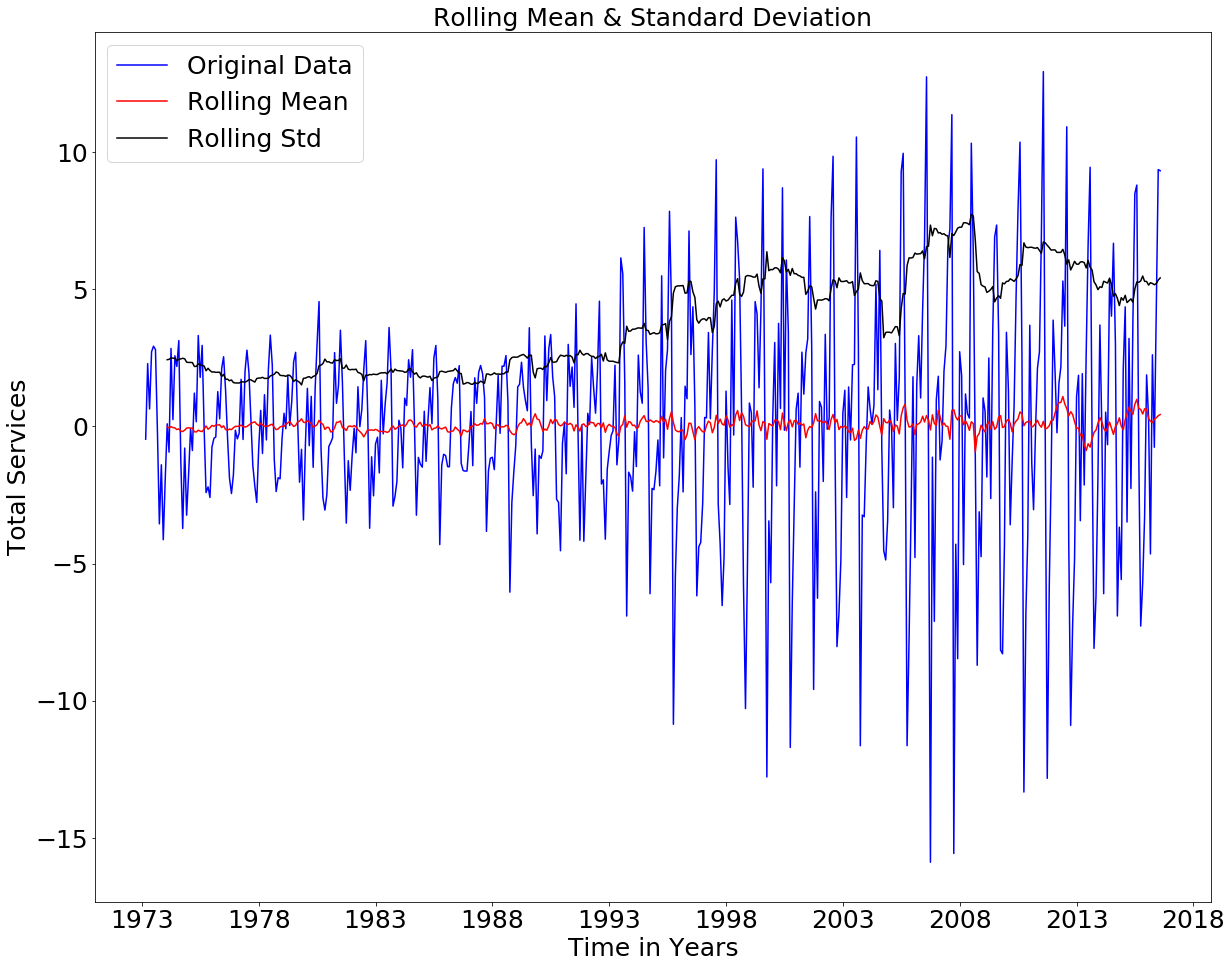

In [63]:
lps_first_difference = lps - lps.shift(1)  
TestStationaryPlot(lps_first_difference.dropna(inplace=False))

In [64]:
TestStationaryAdfuller(lps_first_difference.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


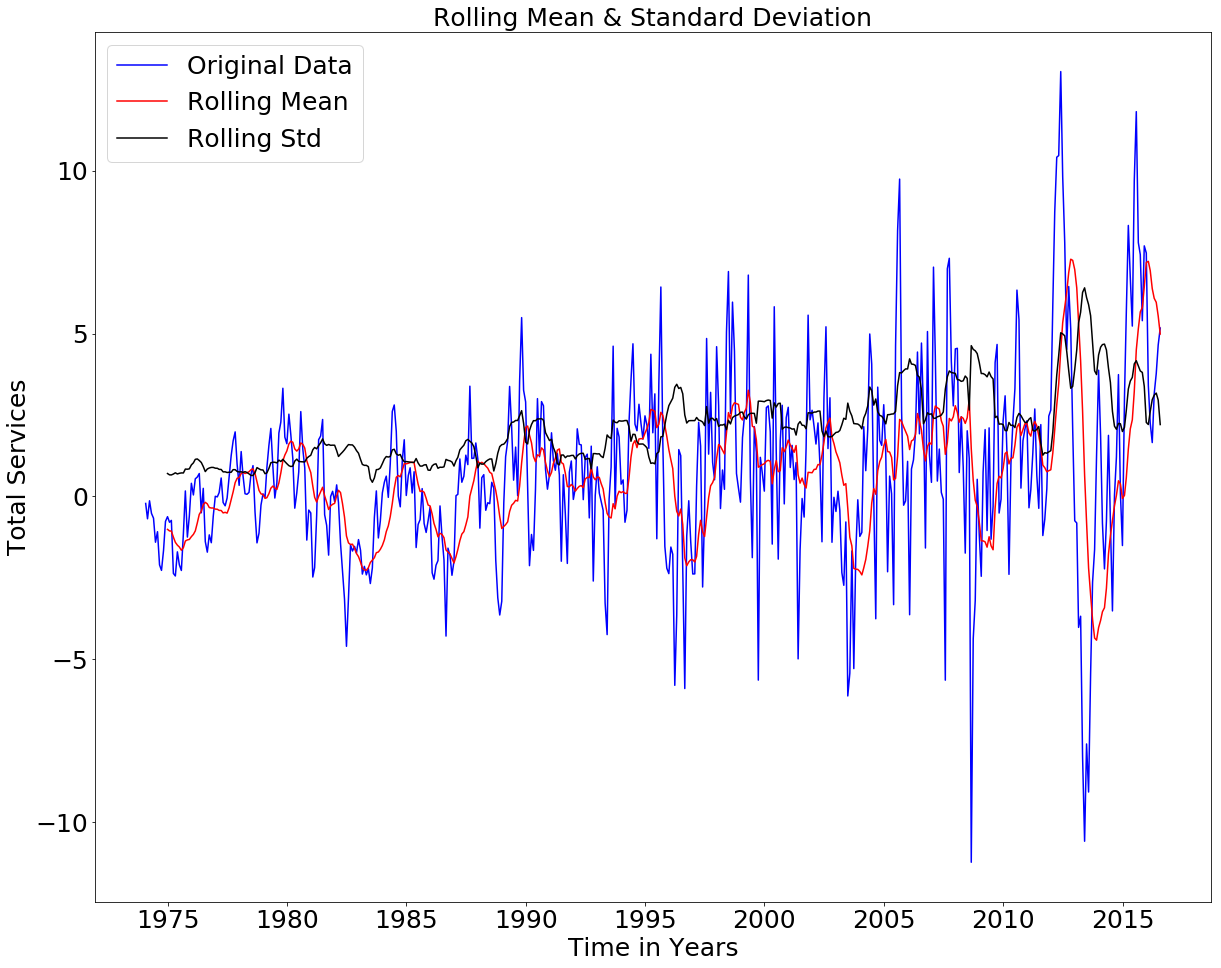

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [65]:
lps_seasonal_difference = lps - lps.shift(12)  
TestStationaryPlot(lps_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(lps_seasonal_difference.dropna(inplace=False))

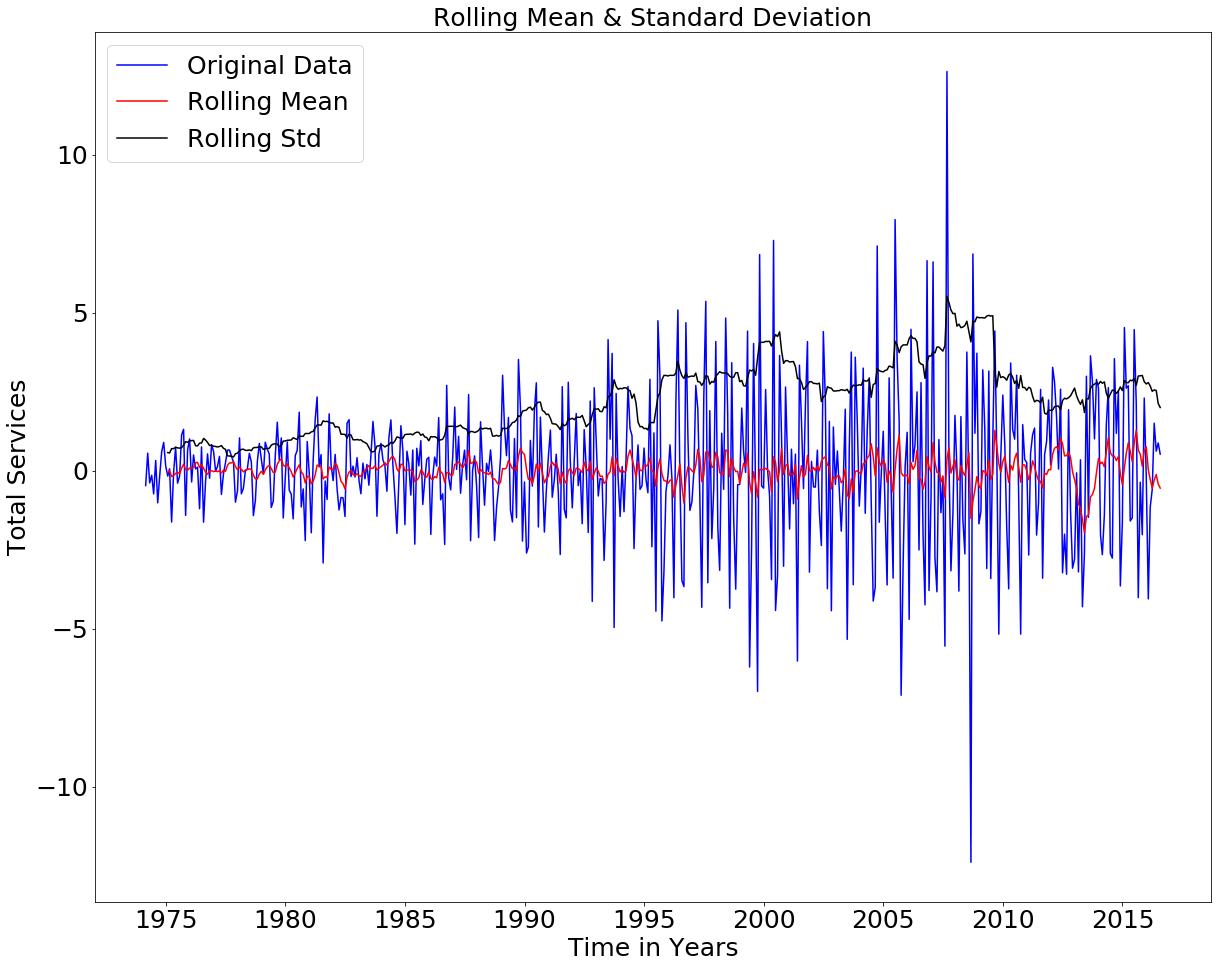

In [66]:
lps_seasonal_first_difference = lps_first_difference - lps_first_difference.shift(12)  
TestStationaryPlot(lps_seasonal_first_difference.dropna(inplace=False))

In [67]:
TestStationaryAdfuller(lps_seasonal_first_difference.dropna(inplace=False))

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


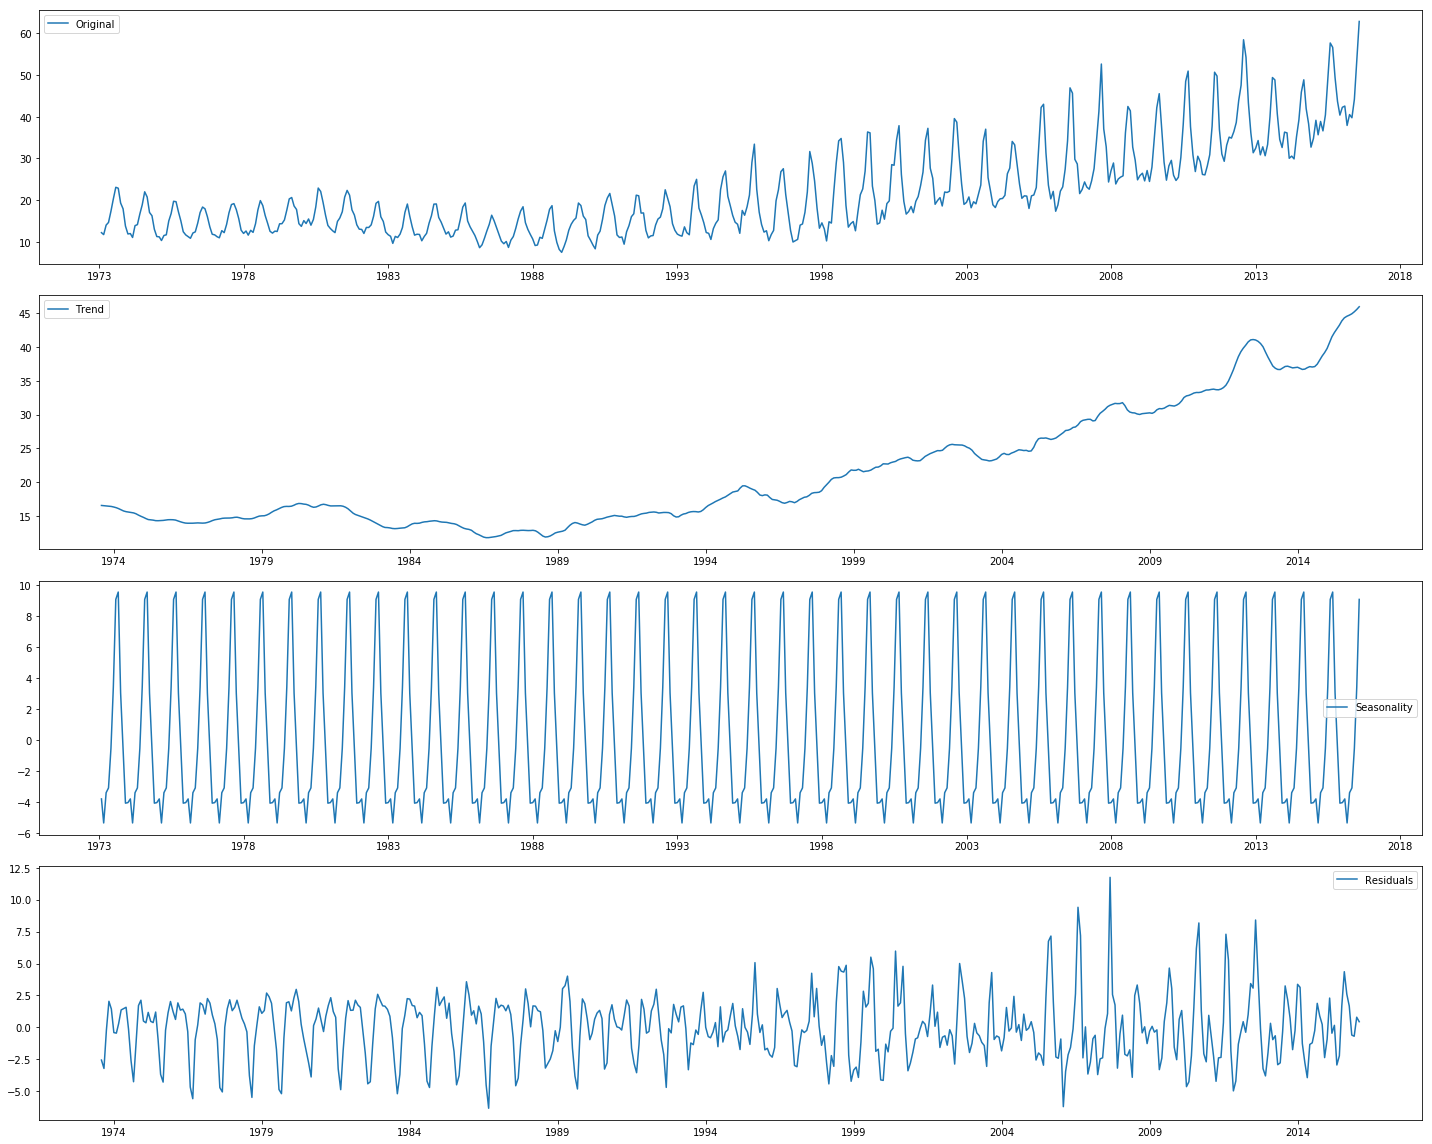

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(lps)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(lps, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

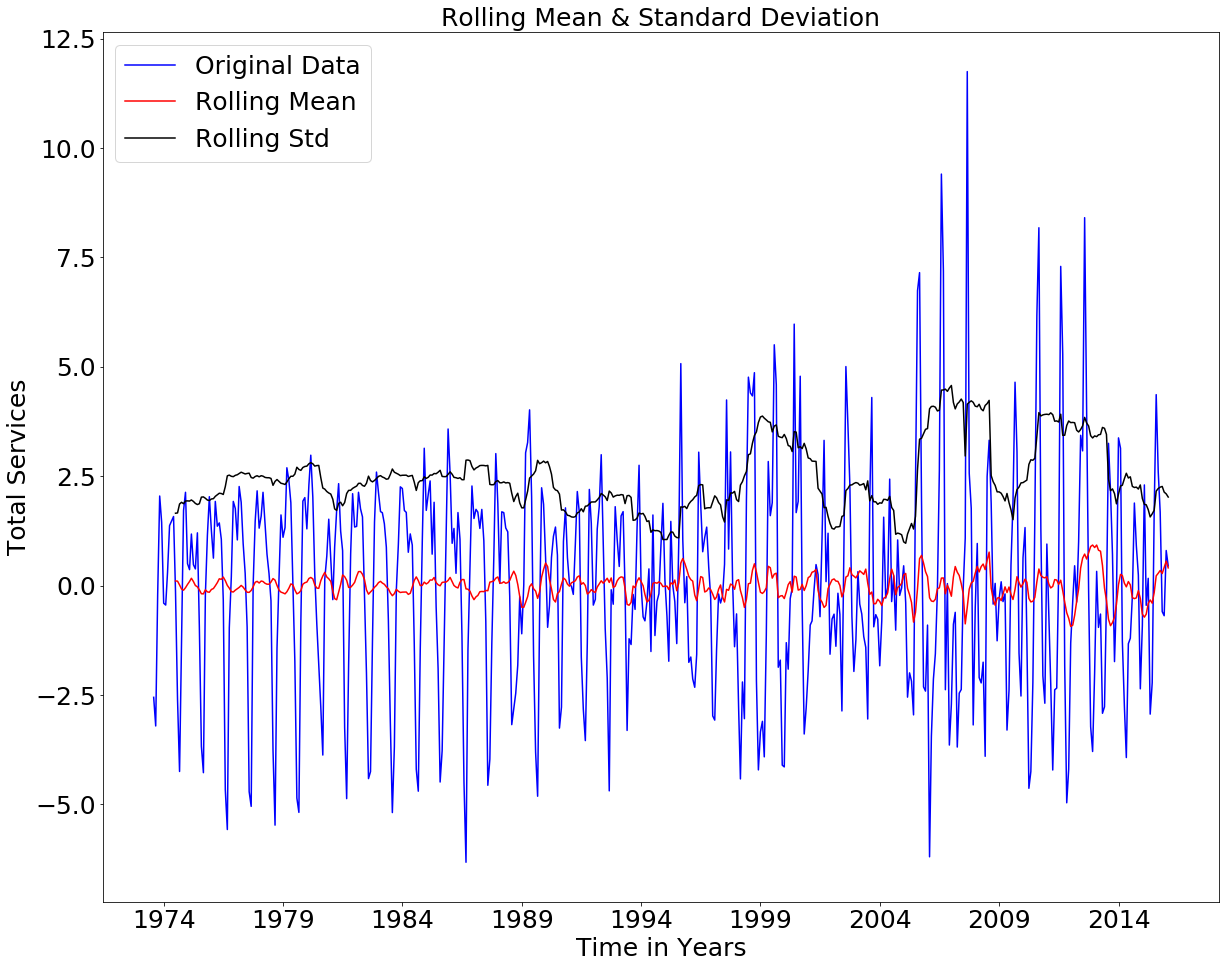

Test Statistic                -8.547084e+00
p-value                        9.439345e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [69]:
lps_decompose = residual
lps_decompose.dropna(inplace=True)
TestStationaryPlot(lps_decompose)
TestStationaryAdfuller(lps_decompose)

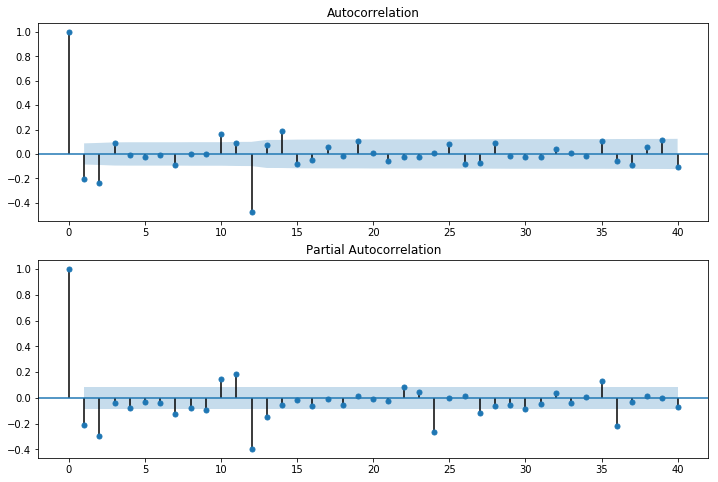

In [70]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(lps_seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(lps_seasonal_first_difference.iloc[13:], lags=40, ax=ax2)

In [71]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))
print('SARIMAX: {} x {}'.format(pdq[3], pdq_x_QDQs[3]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)


In [72]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(lps,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [73]:
mod = sm.tsa.statespace.SARIMAX(lps, 
                                order=(0,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                  Social Networking   No. Observations:                  523
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -1017.293
Date:                            Tue, 17 Apr 2018   AIC                           2040.585
Time:                                    15:28:15   BIC                           2053.364
Sample:                                01-31-1973   HQIC                          2045.590
                                     - 07-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2906      0.038     -7.729      0.000      -0.364      -0.217
ma.S.L12      -0.7034      0.028   

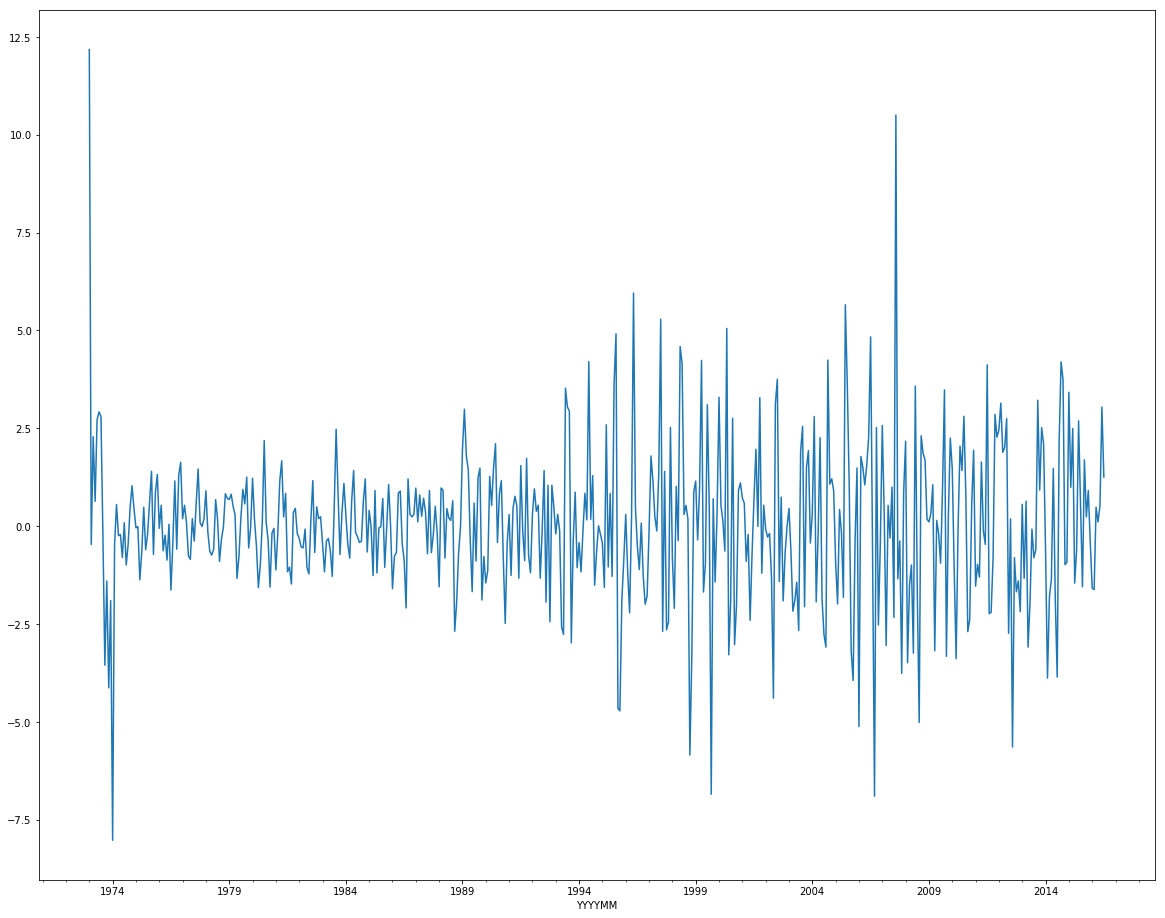

In [74]:
results.resid.plot()

In [75]:
print(results.resid.describe())

count    523.000000
mean       0.042147
std        1.971477
min       -8.023668
25%       -0.964727
50%       -0.007017
75%        0.953965
max       12.175000
dtype: float64


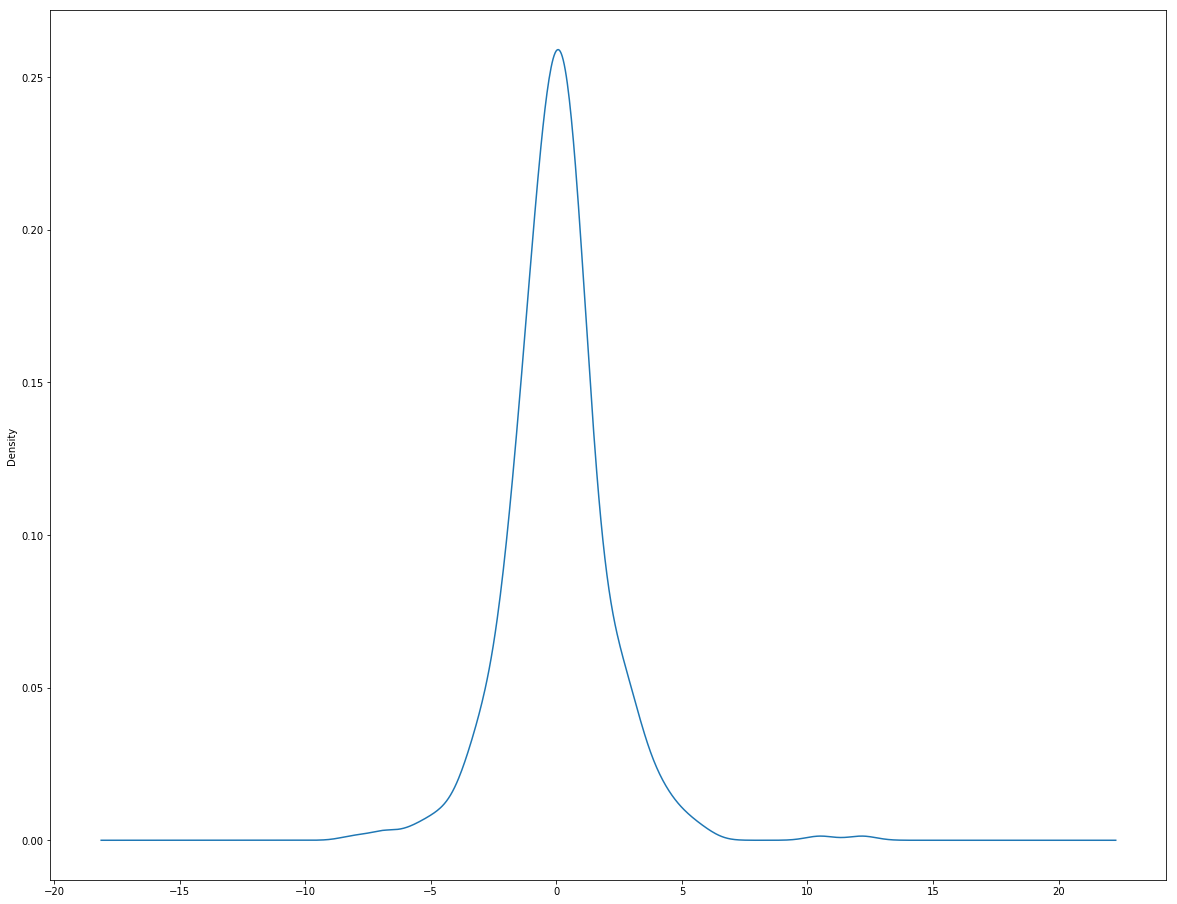

In [76]:
results.resid.plot(kind='kde')

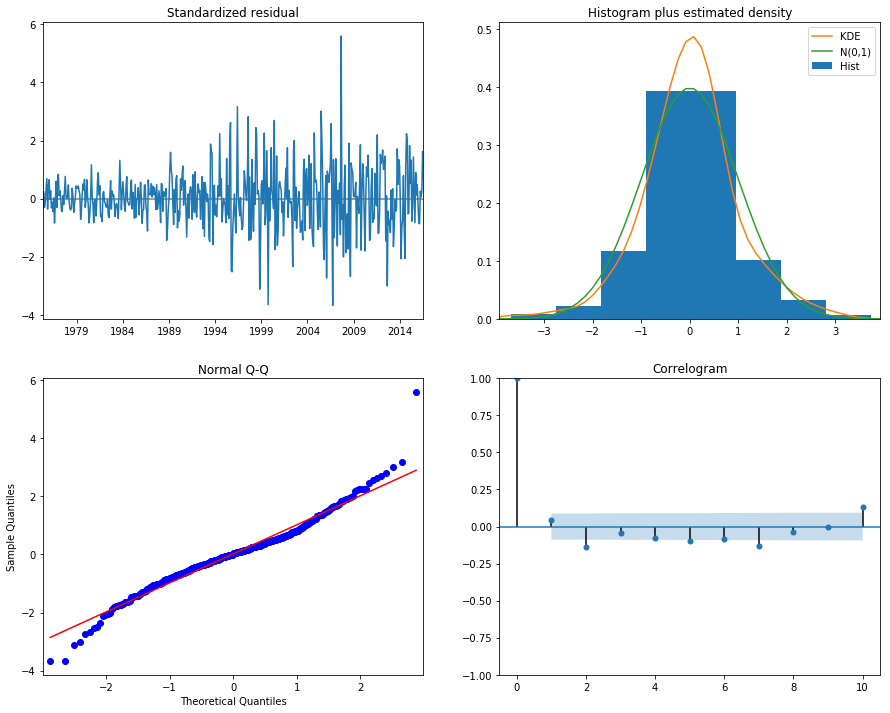

In [77]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [78]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

lower Social Networking  upper Social Networking
2013-01-31                30.059684                37.411007
2013-02-28                28.513036                35.864359
2013-03-31                28.463067                35.814390
2013-04-30                30.054276                37.405599
2013-05-31                31.636983                38.988306

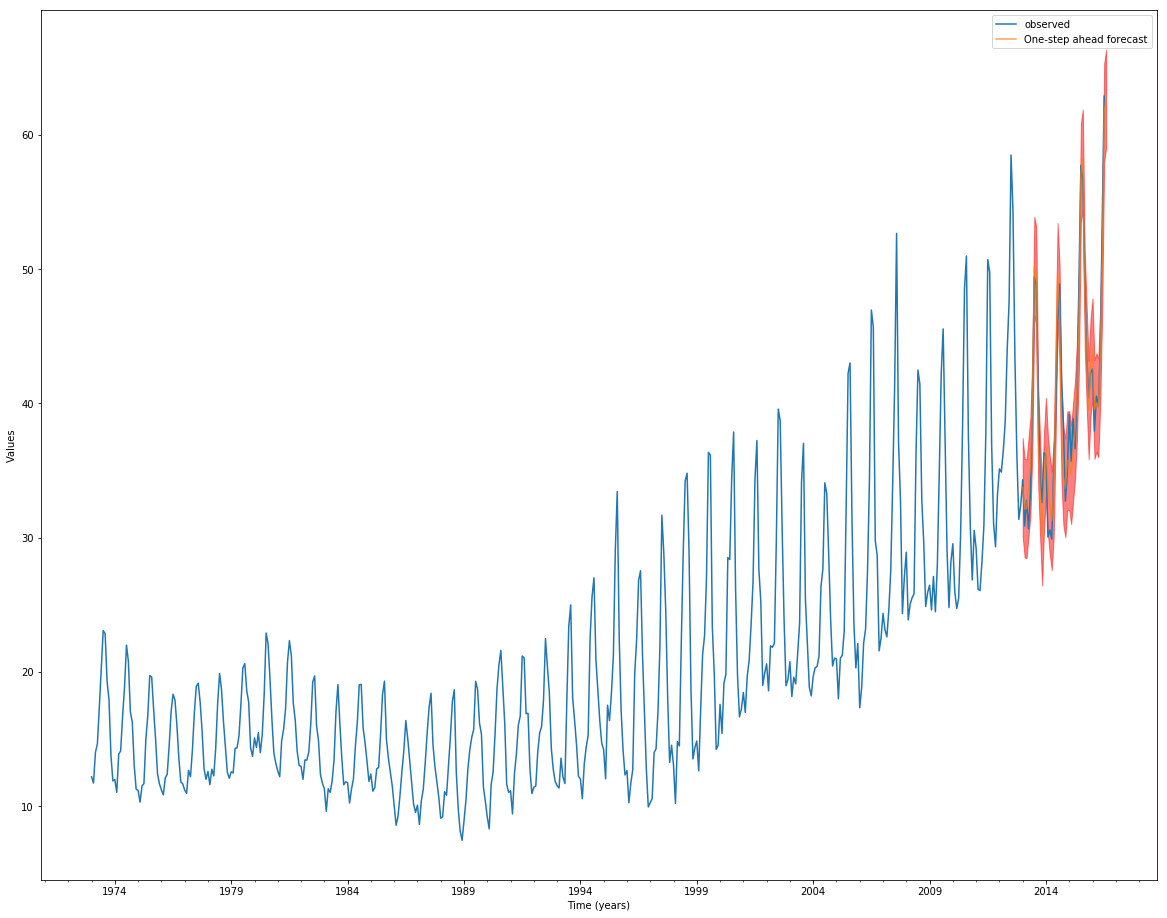

In [79]:
ax = lps['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Values')
plt.legend()

plt.show()

In [80]:
lps_forecast = pred.predicted_mean
lps_truth = lps['2013-01-31':]

# Compute the mean square error
mse = ((lps_forecast - lps_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {}'
      .format(np.sqrt(((lps_forecast-lps_truth)**2)/len(lps_forecast))))
print('The Mean Absolute Error (MAE) of the forcast: {}'
      .format(np.abs(((lps_forecast-lps_truth))/len(lps_forecast))))


The Mean Squared Error (MSE) of the forecast is 3.95
The Root Mean Square Error (RMSE) of the forcast: 2013-01-31    0.084220
2013-02-28    0.200761
2013-03-31    0.096374
2013-04-30    0.465826
2013-05-31    0.297840
2013-06-30    0.011304
2013-07-31    0.121612
2013-08-31    0.091420
2013-09-30    0.485102
2013-10-31    0.139432
2013-11-30    0.379289
2013-12-31    0.315869
2014-01-31    0.088453
2014-02-28    0.585141
2014-03-31    0.272716
2014-04-30    0.205143
2014-05-31    0.222438
2014-06-30    0.277420
2014-07-31    0.581286
2014-08-31    0.325922
2014-09-30    0.632652
2014-10-31    0.564021
2014-11-30    0.148075
2014-12-31    0.139126
2015-01-31    0.515718
2015-02-28    0.149821
2015-03-31    0.376234
2015-04-30    0.219385
2015-05-31    0.090887
2015-06-30    0.405813
2015-07-31    0.085199
2015-08-31    0.233219
2015-09-30    0.255143
2015-10-31    0.035677
2015-11-30    0.137217
2015-12-31    0.061041
2016-01-31    0.238464
2016-02-29    0.244344
2016-03-31    0.073018


In [81]:
lps_pred_concat = pd.concat([lps_truth, lps_forecast])

In [82]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-31'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


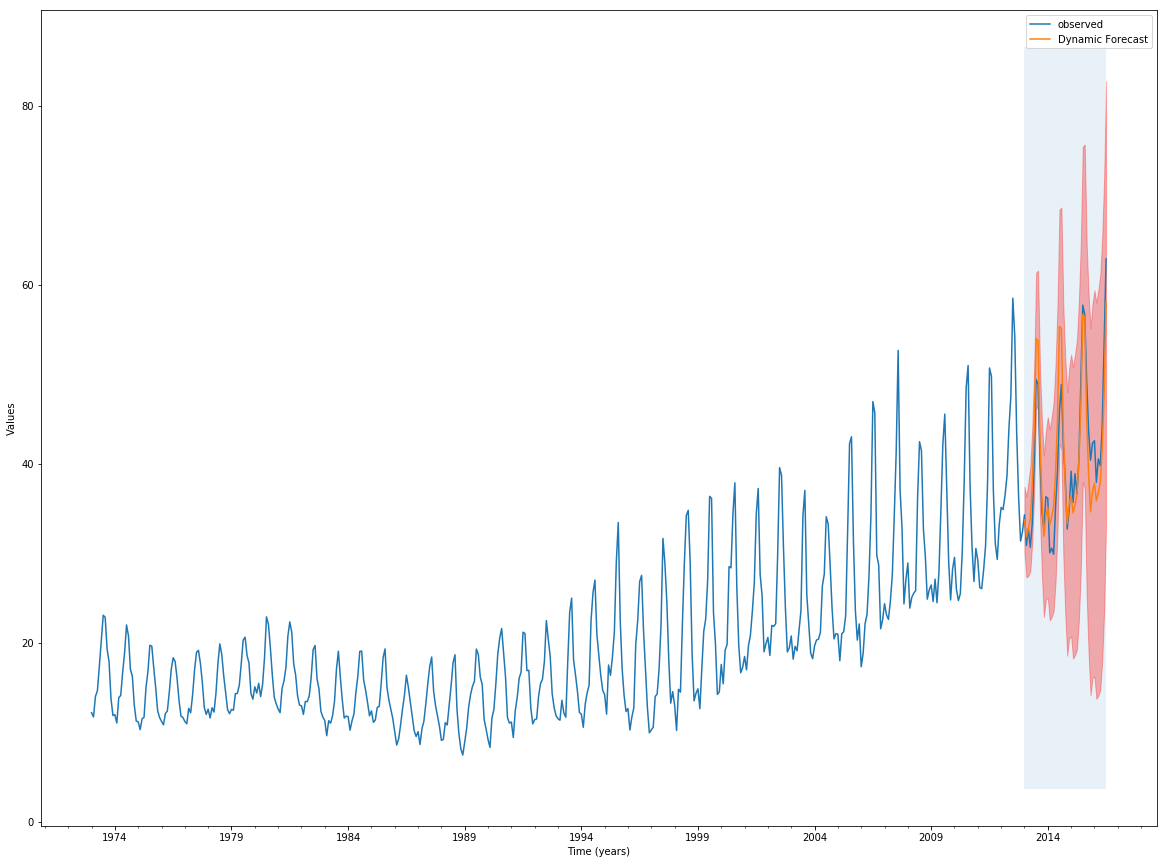

In [83]:
ax = lps['1973':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 lps.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Values')

plt.legend()
plt.show()

In [84]:
# Extract the predicted and true values of our time series
lps_forecast = pred_dynamic.predicted_mean
lps_orginal = lps['2013-01-31':]

# Compute the mean square error
mse = ((lps_forecast - lps_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((lps_forecast-lps_orginal)**2)/len(lps_forecast))))
print('The Mean Absolute Error (MAE) of the forcast: {:.4f}'
      .format(np.abs(sum((lps_forecast-lps_orginal))/len(lps_forecast))))

The Mean Squared Error (MSE) of the forecast is 13.28
The Root Mean Square Error (RMSE) of the forcast: 3.6442
The Mean Absolute Error (MAE) of the forcast: 0.0494


In [85]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()


lower Social Networking  upper Social Networking
2016-08-31                58.994563                66.345886
2016-09-30                49.378915                58.392252
2016-10-31                43.154346                53.567727
2016-11-30                38.660020                50.306341
2016-12-31                40.449676                53.210361

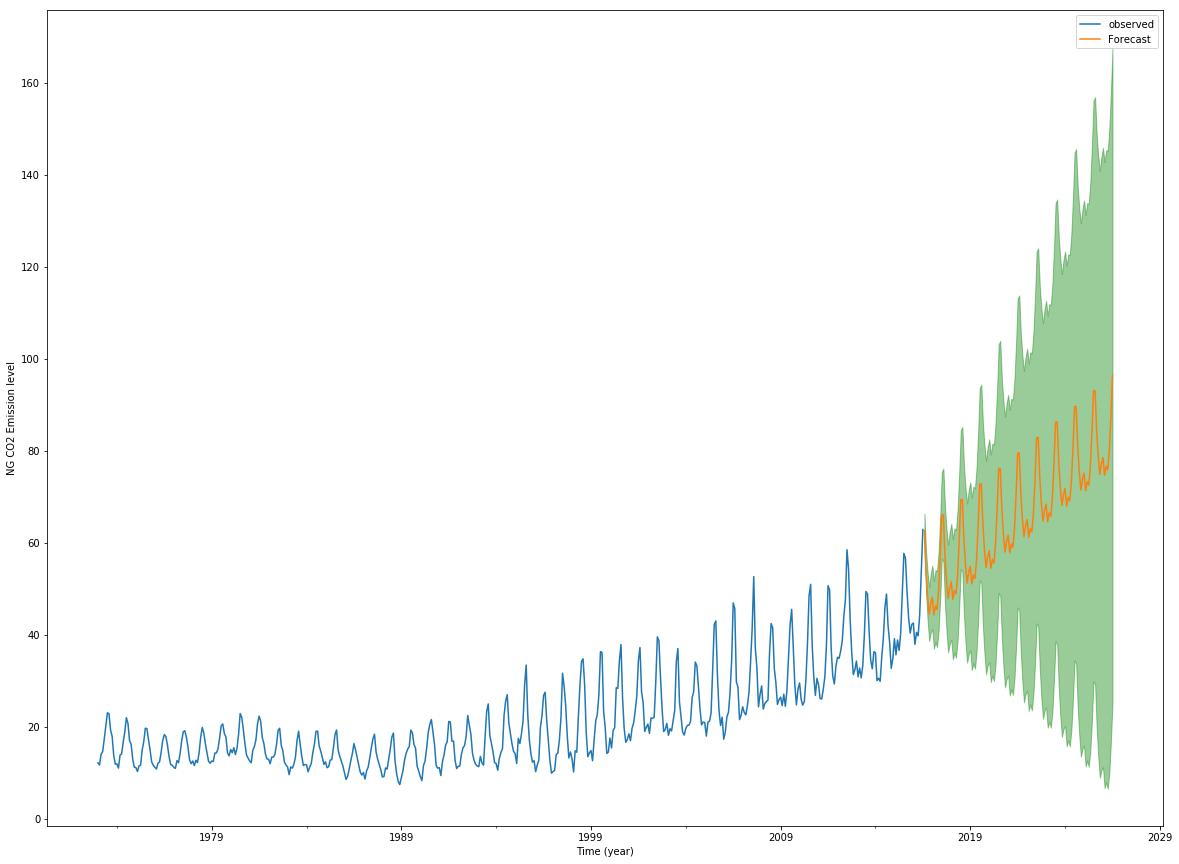

In [86]:
ax = lps.plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('NG CO2 Emission level')

plt.legend()
plt.show()